# **Deep Learning Assignment** 
## Question 1
***
> Submitted by: &emsp;**Aw Chong Kiang (22034803)** <br>
Date: &emsp;&emsp;&emsp;&emsp;&ensp;**26 Jun 2022**

## Objective: Develop an ANN model to classify the 60 sonar readings to two classes, Rocks and Mines
<img src="data\sonar.png" width="500" height="500">

Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/) Irvine, CA: University of California, School of Information and Computer Science.

## Dataset Information
- Total of **208** sonar patterns were recorded:
    - 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions.
    - 967 patters obtained from rocks under similar conditions.
- The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock. However, actual aspect angles used for each pattern is unknown.
- Each pattern contains 60 sonar signals ranging from **0 to 1**. Each number represents energy within a particular frequency band, integrated over a certain period of time.


## Load Data

In [74]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Tensorflow
import tensorflow as tf
from keras import models
from keras import layers
from keras import regularizers

# Scikit learn
from sklearn.model_selection import train_test_split


# 'dataset_40_sonar.csv' file stored in 'data' sub-folder
data_path = ['data']
filepath = os.sep.join(data_path + ['dataset_40_sonar.csv'])

# Create data frame (no header)
data = pd.read_csv(filepath, sep=',', header=0)
data

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,Mine
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,Mine
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,Mine
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,Mine


## Data Exploration

In [11]:
print(f"No. of rows    : {data.shape[0]}")
print(f"No. of columns : {data.shape[1]}")

No. of rows    : 208
No. of columns : 61


In [69]:
data.dtypes.value_counts()

float64    60
object      1
dtype: int64

Total of 60 feature column - all of which are float64 types. Only 1 categorical column, which is the Label "Class"

#### Check for Outliers

In [37]:
# Extract columns that are features i.e. drop 'Class' label
feature_col = [column for column in data.columns if column != 'Class']

# Return list of columns having outlier
outlier_list = [column for column in data[feature_col].columns if data[column].min() < 0 or data[column].max() > 1]

if outlier_list:
    print("Columns having outliers : {}".format(", ".join(outlier_list)))
else:
    print("All data points are between 0 and 1")

All data points are between 0 and 1


#### Check for Missing information

In [56]:
# Return list of rows having missing values
missing_list = [row for row in range(len(data)) if data.isna().any(axis=1)[row]]

if missing_list:
    print("Rows having missing values : {}".format(", ".join(missing_list)))
else:
    print("No missing values found")

No missing values found


#### Attributes Plot

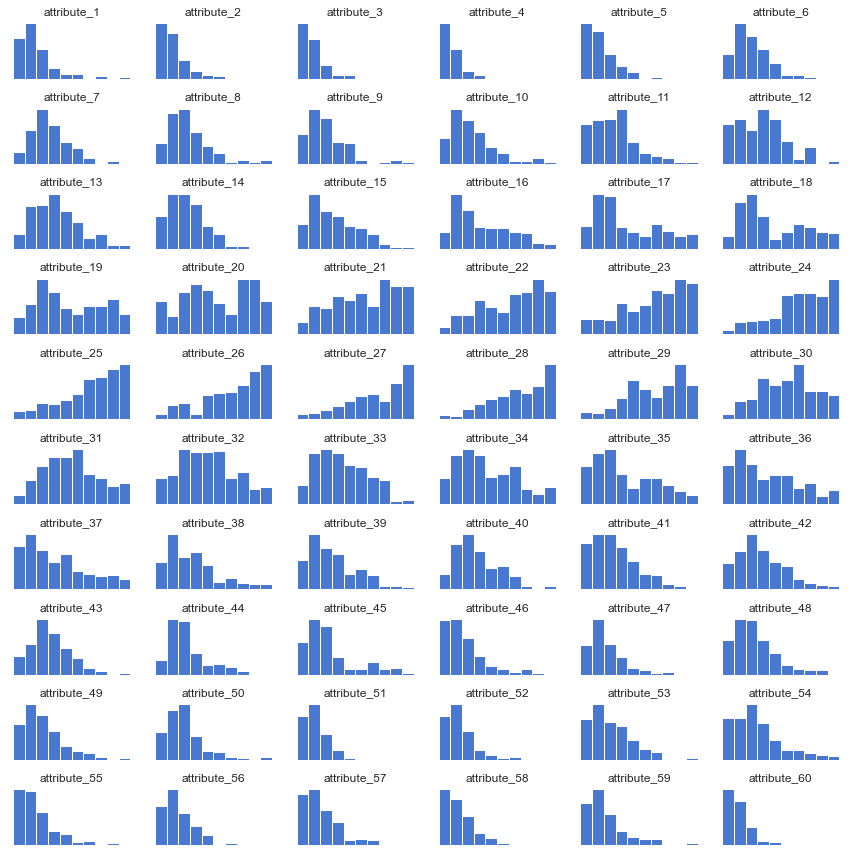

In [115]:
plt.figure(figsize=(12,12))

for i, col in enumerate(data[feature_col]):
    plt.subplot(10, 6, i+1)
    plt.hist(data[col])
    plt.title(col)
    plt.axis('off')

plt.tight_layout()
plt.show()

Attributes show signficant skew, which may impact classification. 

#### Check for Duplicates

In [117]:
# Sum of all duplicated rows (if any)
print(f"Number of duplicated rows in data set : {data.duplicated().sum()}")

Number of duplicated rows in data set : 0


## Data Preparation
- Numerical features have values between 0 and 1. Hence, no scaling is required.
- All features are non-categorical. Hence, no one hot encoding required.
- Target will be one-hot encoded instead.

In [119]:
# Removing target from data set
X_data = data[feature_col]
y_data = data['Class']

# One hot encode Categorical data
y_data = pd.get_dummies(y_data)
y_data

,Mine,Rock
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
203,1,0
204,1,0
205,1,0
206,1,0


## Create & Train Model

In [120]:
# Split up data to 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Print data shape for X_train, X_test, y_train, y_test
print("Data shape for X_train : {}".format(X_train.shape))
print("Data shape for X_test  : {}".format(X_test.shape))
print("Data shape for y_train : {}".format(y_train.shape))
print("Data shape for y_test  : {}".format(y_test.shape))

Data shape for X_train : (166, 60)
Data shape for X_test  : (42, 60)
Data shape for y_train : (166, 2)
Data shape for y_test  : (42, 2)


In [173]:
# Define classification model
def classifier_model(model_name):
    network = models.Sequential(name=model_name)
    network.add(layers.Dense(128, activation='relu', input_shape=(len(feature_col),), name='1st_layer'))
    network.add(layers.Dense(2, activation='softmax', name='output'))
    return network

model = classifier_model('Sonar_Classifier')

#print model summary
print(model.summary())

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model
history = model.fit(X_train, y_train, epochs=40, batch_size=16, validation_split=0.2)

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss      : {}".format(test_loss))
print("Test accuracy : {}".format(test_acc))

Model: "Sonar_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1st_layer (Dense)           (None, 128)               7808      
                                                                 
 output (Dense)              (None, 2)                 258       
                                                                 
Total params: 8,066
Trainable params: 8,066
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/40
9/9 [==============================] - 0s 17ms/step - loss: 0.7101 - accuracy: 0.4773 - val_loss: 0.6635 - val_accuracy: 0.5882
Epoch 2/40
9/9 [==============================] - 0s 3ms/step - loss: 0.6628 - accuracy: 0.6364 - val_loss: 0.6671 - val_accuracy: 0.6471
Epoch 3/40
9/9 [==============================] - 0s 3ms/step - loss: 0.6395 - accuracy: 0.7652 - val_loss: 0.6429 - val_accuracy: 0.7941
Epoch 4/40
9/9 [========

## Visualize Performance

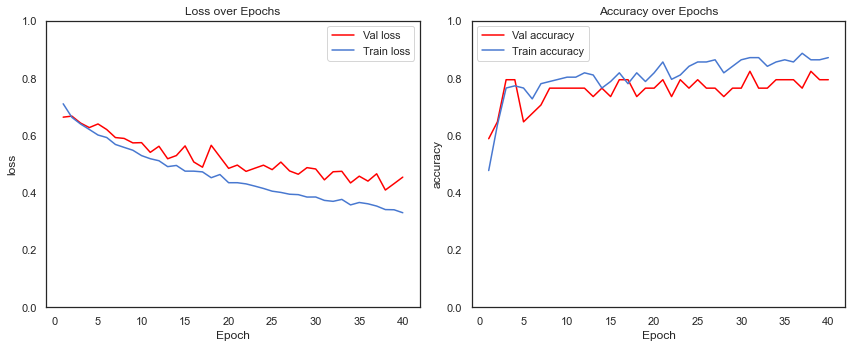

In [174]:
# Define function to plot Accuracy and Loss
def plot_perf(history, info):
    info = info.lower() # Ensure lowercase
    train_info = history.history[info]
    val_info = history.history['val_'+info]
    x = list(range(1, len(train_info) + 1))
    
    plt.ylim(0, 1)
    plt.plot(x, val_info, color = 'red', label = 'Val '+info)
    plt.plot(x, train_info, label = 'Train '+info)
    plt.xlabel('Epoch')
    plt.ylabel(info)
    plt.title(f'{info.title()} over Epochs')
    plt.legend()

# Plot loss and Accuracy graphs
plt.figure(figsize=(12,5))
for i, col in enumerate(['loss', 'accuracy']):
    plt.subplot(1, 2, i+1)
    plot_perf(history, col)

plt.tight_layout()

## Conclusion
- Both loss and accuracy graph show slight divergence towards the end of training cycle (about 30 epochs onwards). This may suggest a slight instance of over-fitting.
- If number of epochs increases further, further divergence of validation accuracy versus training accuracy may provide more evidence of overfitting especially if the training accuracy increases close to 100% (i.e. model memorizes the training data)
- Regularization can be used to force the weights smaller thereby reducing over-fitting.
- Test accuracy shows about 83% while validation accuracy is about 78%. This doesn't provide much evidence of under-fitting. Perhaps having more data samples to train the model can shed more light on whether our model is too simplistic (i.e. under-fitting)